# **1. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import (
    train_test_split, StratifiedKFold, cross_val_score, GridSearchCV, RandomizedSearchCV
)
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import classification_report, confusion_matrix

from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier


# **2. Memuat Dataset dari Hasil Clustering**

Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

In [2]:
from google.colab import files
files.upload()

Saving Dataset_clustering.csv to Dataset_clustering.csv


{'Dataset_clustering.csv': b'TransactionAmount,TransactionType,Channel,LoginAttempts,CustomerOccupation,Cluster_Kmeans\n14.089999999999975,Debit,ATM,1.0,Doctor,0\n376.24,Debit,ATM,1.0,Doctor,0\n126.28999999999999,Debit,Online,1.0,Student,0\n184.5,Debit,Online,1.0,Student,0\n13.449999999999989,Credit,Online,1.0,Student,0\n92.15,Debit,ATM,1.0,Student,0\n7.079999999999984,Credit,ATM,1.0,Doctor,0\n171.42,Credit,Branch,1.0,Retired,0\n106.23000000000002,Credit,Branch,1.0,Engineer,0\n815.96,Debit,ATM,1.0,Doctor,0\n17.78000000000003,Credit,Online,1.0,Engineer,0\n190.02000000000004,Debit,Online,1.0,Student,0\n494.52,Credit,Branch,1.0,Student,0\n781.76,Debit,ATM,1.0,Student,0\n166.99,Debit,Online,1.0,Student,0\n465.45,Debit,ATM,1.0,Engineer,0\n555.8,Credit,Branch,1.0,Student,0\n492.93,Debit,Online,1.0,Engineer,0\n18.680000000000007,Credit,Branch,1.0,Retired,0\n71.47999999999999,Credit,Online,1.0,Student,0\n59.31999999999999,Debit,Branch,1.0,Retired,0\n85.76999999999998,Debit,Branch,1.0,Doctor,0\

In [3]:
df = pd.read_csv('Dataset_clustering.csv')

In [4]:
df

,TransactionAmount,TransactionType,Channel,LoginAttempts,CustomerOccupation,Cluster_Kmeans
0,14.09,Debit,ATM,1.0,Doctor,0
1,376.24,Debit,ATM,1.0,Doctor,0
2,126.29,Debit,Online,1.0,Student,0
3,184.50,Debit,Online,1.0,Student,0
4,13.45,Credit,Online,1.0,Student,0
...,...,...,...,...,...,...
2507,856.21,Credit,Branch,1.0,Doctor,0
2508,251.54,Debit,Branch,1.0,Doctor,0
2509,28.63,Debit,Branch,1.0,Retired,0
2510,185.97,Debit,Online,1.0,Student,0


In [5]:
df.Cluster_Kmeans.value_counts()

,count
Cluster_Kmeans,
0,2417
1,95


# **3. Data Splitting**

Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

In [6]:
numerical_features = ['TransactionAmount', 'LoginAttempts']
categorical_features = ['TransactionType', 'Channel', 'CustomerOccupation']
X = df[numerical_features + categorical_features]
y = df['Cluster_Kmeans']

In [7]:
encoder = OneHotEncoder(handle_unknown='ignore')
X_encoded = encoder.fit_transform(X[categorical_features]).toarray()

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X[numerical_features])
X_preprocessed = np.hstack((X_scaled, X_encoded))


In [8]:
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.3, random_state=42, stratify=y)

# **4. Membangun Model Klasifikasi**


## **a. Membangun Model Klasifikasi**

Setelah memilih algoritma klasifikasi yang sesuai, langkah selanjutnya adalah melatih model menggunakan data latih.

Berikut adalah rekomendasi tahapannya.
1. Pilih algoritma klasifikasi yang sesuai, seperti Logistic Regression, Decision Tree, Random Forest, atau K-Nearest Neighbors (KNN).
2. Latih model menggunakan data latih.

In [9]:
smote = SMOTE(random_state=42, sampling_strategy=0.2)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

models = {
    "Random Forest": RandomForestClassifier(n_estimators=30, max_depth=3, random_state=42),
    "SVM": SVC(C=1.0, kernel='rbf', probability=True)
}

Tulis narasi atau penjelasan algoritma yang Anda gunakan.

## **b. Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Lakukan prediksi menggunakan data uji.
2. Hitung metrik evaluasi seperti Accuracy dan F1-Score (Opsional: Precision dan Recall).
3. Buat confusion matrix untuk melihat detail prediksi benar dan salah.


=== Random Forest ===
[[725   0]
 [  1  28]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       725
           1       1.00      0.97      0.98        29

    accuracy                           1.00       754
   macro avg       1.00      0.98      0.99       754
weighted avg       1.00      1.00      1.00       754



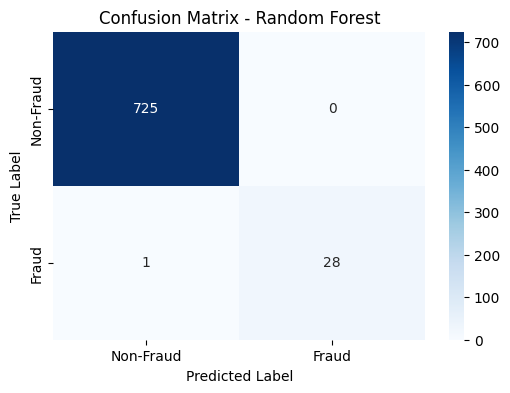

Cross-Validation F1 Scores: [0.91428571 0.91428571 0.97297297 0.91428571 0.94444444]
Mean F1 Score: 0.9320549120549121

=== SVM ===
[[723   2]
 [  1  28]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       725
           1       0.93      0.97      0.95        29

    accuracy                           1.00       754
   macro avg       0.97      0.98      0.97       754
weighted avg       1.00      1.00      1.00       754



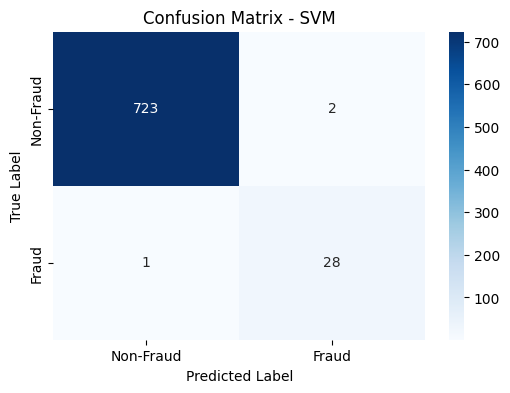

Cross-Validation F1 Scores: [0.97297297 0.97297297 1.         0.97297297 0.97297297]
Mean F1 Score: 0.9783783783783784


In [10]:
for name, model in models.items():
    print(f"\n=== {name} ===")

    clf = ImbPipeline(steps=[
        ('classifier', model)
    ])

    clf.fit(X_train_resampled, y_train_resampled)
    y_pred = clf.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    print(cm)
    print(classification_report(y_test, y_pred))

    # Plot Confusion Matrix
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'])
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(f'Confusion Matrix - {name}')
    plt.show()

    # Cross-Validation F1 Score
    scores = cross_val_score(clf, X_preprocessed, y, cv=5, scoring='f1')
    print("Cross-Validation F1 Scores:", scores)
    print("Mean F1 Score:", scores.mean())

Tulis hasil evaluasi algoritma yang digunakan, jika Anda menggunakan 2 algoritma, maka bandingkan hasilnya.

## **c. Tuning Model Klasifikasi (Optional)**

Gunakan GridSearchCV, RandomizedSearchCV, atau metode lainnya untuk mencari kombinasi hyperparameter terbaik

In [11]:
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVM": SVC(probability=True, random_state=42)
}

In [12]:
hyperparameters = {
    "Random Forest": {
        'classifier__n_estimators': [50, 100],
        'classifier__max_depth': [3, 4],
        'classifier__min_samples_split': [20],
        'classifier__min_samples_leaf': [5, 10],
        'classifier__bootstrap': [True],
        'classifier__max_features': ['sqrt'],
        'classifier__ccp_alpha': [0.01]
    },
    "SVM": {
        'classifier__C': [0.1, 1, 10],
        'classifier__kernel': ['linear', 'rbf'],
        'classifier__gamma': ['scale']
    }
}


skf = StratifiedKFold(n_splits=5)

## **d. Evaluasi Model Klasifikasi setelah Tuning (Optional)**

Berikut adalah rekomendasi tahapannya.
1. Gunakan model dengan hyperparameter terbaik.
2. Hitung ulang metrik evaluasi untuk melihat apakah ada peningkatan performa.


=== Random Forest ===
Best Parameters for Random Forest: {'classifier__bootstrap': True, 'classifier__ccp_alpha': 0.01, 'classifier__max_depth': 4, 'classifier__max_features': 'sqrt', 'classifier__min_samples_leaf': 5, 'classifier__min_samples_split': 20, 'classifier__n_estimators': 100}
[[725   0]
 [  3  26]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       725
           1       1.00      0.90      0.95        29

    accuracy                           1.00       754
   macro avg       1.00      0.95      0.97       754
weighted avg       1.00      1.00      1.00       754



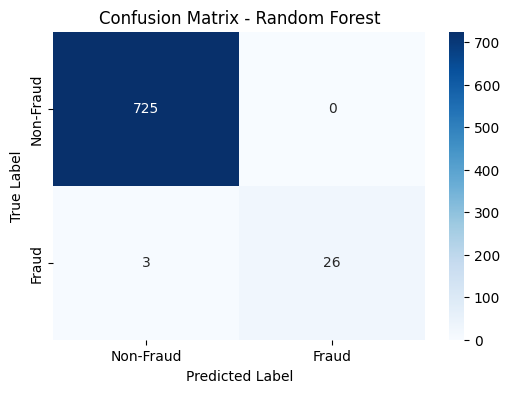

Cross-Validation F1 Scores: [0.97297297 1.         1.         0.97297297 0.94444444]
Mean F1 Score: 0.978078078078078

=== SVM ===
Best Parameters for SVM: {'classifier__C': 1, 'classifier__gamma': 'scale', 'classifier__kernel': 'linear'}
[[724   1]
 [  0  29]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       725
           1       0.97      1.00      0.98        29

    accuracy                           1.00       754
   macro avg       0.98      1.00      0.99       754
weighted avg       1.00      1.00      1.00       754



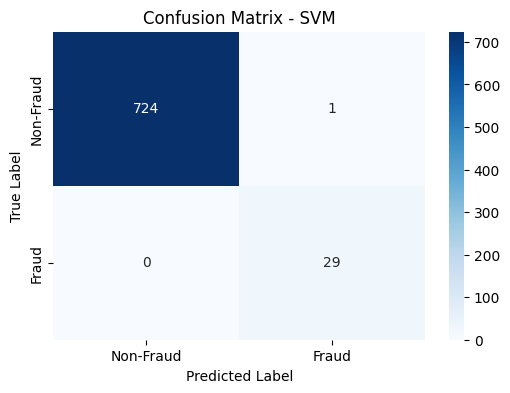

Cross-Validation F1 Scores: [1.         1.         0.97435897 1.         1.        ]
Mean F1 Score: 0.9948717948717949


In [13]:
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.3, random_state=42, stratify=y)

for name, model in models.items():
    print(f"\n=== {name} ===")
    pipeline = ImbPipeline(steps=[
        ('smote', SMOTE(sampling_strategy=0.05, random_state=42)),
        ('classifier', model)
    ])

    grid_search = GridSearchCV(pipeline, hyperparameters[name], cv=3, scoring='f1', n_jobs=-1)
    grid_search.fit(X_train, y_train)

    best_model = grid_search.best_estimator_
    print(f"Best Parameters for {name}: {grid_search.best_params_}")

    y_pred = best_model.predict(X_test)

    cm = confusion_matrix(y_test, y_pred)
    print(cm)
    print(classification_report(y_test, y_pred))

    # Plot Confusion Matrix
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'])
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(f'Confusion Matrix - {name}')
    plt.show()

    # Cross-Validation F1 Score
    scores = cross_val_score(best_model, X_preprocessed, y, cv=skf, scoring='f1')
    print("Cross-Validation F1 Scores:", scores)
    print("Mean F1 Score:", scores.mean())


## **e. Analisis Hasil Evaluasi Model Klasifikasi**

## **1. Random Forest**

### Sebelum Tuning
- **Accuracy**: 100%
- **Precision (Kelas 1 - Minoritas)**: 1.00
- **Recall (Kelas 1 - Minoritas)**: 0.97 → Ada sedikit kekurangan dalam menangkap kelas minoritas
- **Mean F1 Score (CV)**: 0.9321
- **Overfitting**: Tidak terlihat jelas, namun recall sedikit lebih rendah dibanding model lain.

### Sesudah Tuning
- **Accuracy**: 100%
- **Precision (Kelas 1 - Minoritas)**: 1.00
- **Recall (Kelas 1 - Minoritas)**: 0.90 → Sedikit menurun dibanding sebelum tuning
- **Mean F1 Score (CV)**: 0.9781 (Meningkat dari sebelumnya)

## **2. SVM**

### Sebelum Tuning
- **Accuracy**: 100%
- **Precision (Kelas 1 - Minoritas)**: 0.93
- **Recall (Kelas 1 - Minoritas)**: 0.97 → Cukup kuat dalam menangkap kelas minoritas
- **Mean F1 Score (CV)**: 0.9784

### Sesudah Tuning
- **Accuracy**: 100%
- **Precision (Kelas 1 - Minoritas)**: 0.97
- **Recall (Kelas 1 - Minoritas)**: 1.00 → Meningkat dibanding sebelumnya
- **Mean F1 Score (CV)**: 0.9949 (Meningkat signifikan)


## **Kesimpulan**
1. **Random Forest**: Setelah tuning, mean F1 score meningkat dari 0.9321 menjadi 0.9781, tetapi recall untuk kelas minoritas sedikit menurun dari 0.97 menjadi 0.90. Ini menunjukkan bahwa model menjadi lebih seimbang dalam klasifikasi keseluruhan tetapi sedikit lebih lemah dalam menangkap kelas minoritas. Untuk precision, perlu di perhatikan atau di banding lagi dengan dataset yang lebih besar apakah benaran sempuran atau hanya overfitting. Lalu, jika recall tetap menjadi perhatian utama, dapat dicoba teknik balancing data lebih lanjut atau model lain seperti XGBoost.

2. **SVM**: Model mengalami peningkatan signifikan setelah tuning, dengan recall untuk kelas minoritas meningkat menjadi 1.00 dan mean F1 score naik menjadi 0.9949. Ini menunjukkan bahwa tuning yang dilakukan berhasil meningkatkan performa model dalam menangkap kelas minoritas tanpa mengorbankan akurasi keseluruhan. Namun, harus di lihat apakah recall disini overfitting karena sangat sempurna (nilai 1.0) dalam menilai kelas minoritas. Jika diperlukan optimasi lebih lanjut, bisa dicoba pengaturan hyperparameter lebih agresif seperti peningkatan nilai C atau eksplorasi kernel lain, lalu saran selanjutnya adalah menambahkan data lebih banyak lagi (menggunakan dataset lebih besar) sehingga lebih kelihatan dan lebih menghindari overfitting.

Secara keseluruhan, tuning memberikan dampak positif terutama pada SVM, sedangkan Random Forest mengalami sedikit penurunan recall. Pemilihan model terbaik akan bergantung pada apakah prioritas utama adalah recall untuk kelas minoritas atau keseimbangan keseluruhan performa model.

